## Lab 9: Exploring Summary Statistics and Loss Functions

### Due Date: Friday April 3

In this lab, you will:

1. Define loss functions and find their minimum values.
2. Explore different techniques for finding the maximum or mininum of a function.


### Collaboration Policy

Data science is a collaborative activity. While you may talk to others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:

*List collaborators here*
Madi Perez

# Loss Functions

A loss function is a measure of how well a model is able to predict the expected outcome. In other words, it measures the deviations of the predicted values from the observed values. In this lab we will implement the squared loss and absolute loss functions.  

In the formulations below *y* represents the observed values and *c* stands for some constant value representing a summary statistic.

1. **Squared Loss** (also known as the $\ell_2$ loss pronounced "ell-two"):

$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, c \right) = \left( y - c\right)^2
$$

2. **Absolute Loss** (also known as the $\ell_1$ loss pronounced "ell-one"):

$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, c \right) = \left| y - c \right|
$$

In [1]:
# Run this cell

import pandas as pd
import numpy as np
np.random.seed(42)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import minimize

# Packages for configuration

import dsua_112_utils
import sys, os, pickle
home_path = os.environ["HOME"]

In [2]:
# TEST 

assert 'pandas' in sys.modules and "pd" in locals()
assert 'numpy' in sys.modules and "np" in locals()
assert 'matplotlib' in sys.modules and "plt" in locals()
assert 'seaborn' in sys.modules and "sns" in locals()
assert "dsua_112_utils" in sys.modules and "home_path" in locals()

# Squared Loss

## Question 1a: Implement the squared loss function


$$\Large
L\left(y,  c\right) = \left( y - c \right)^2
$$

Using the comments below, implement the squared loss function. Your answer should not use any loops.

In [3]:
def squared_loss(y_obs, c):
    """
    Calculate the squared loss of the observed data and a summary statistic.
    
    Parameters
    ------------
    y_obs: an observed value
    c : some constant representing a summary statistic
    
    Returns
    ------------
    The squared loss between the observation and the summary statistic.
    """
    res = y_obs - c
    return res ** 2
    # YOUR CODE HERE
    #raise NotImplementedError()

In [4]:
# TEST
assert squared_loss(2, 1)==1


In [5]:
# TEST
assert squared_loss(2, 0)==4


## Question 1b: Plotting the Squared Loss

Let us now consider the case where `y_obs` equals 10. For arbitrary values of `c`, plot the squared loss using the function you implemented in the previous question. Don't forget to label the vertical axis `L2 loss` and the horizontal axis `c`.

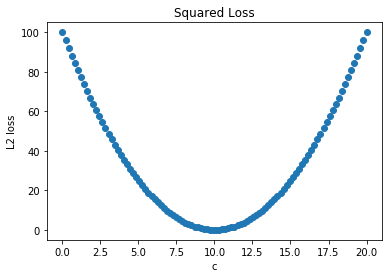

In [6]:
y_obs = 10
c_values = np.linspace(0, 20, 100) # some values of c
values = []
for i in range(len(c_values)):
    values.append(squared_loss(y_obs, c_values[i]))

plt.scatter(x = c_values, y = values)
plt.title('Squared Loss')
plt.xlabel('c')
plt.ylabel('L2 loss');
# YOUR CODE HERE
#raise NotImplementedError()

q1b_gca = plt.gca(); # leave for grading purposes

In [7]:
# TEST 

assert q1b_gca.get_xlabel() == "c"
assert q1b_gca.get_ylabel() == "L2 loss"


## Question 2: Mean Squared Error for the Tips Data

Let's apply our knowledge to some real world data. Below you are given an array of tips from a restaurant. In this section, you will try to find the best statistic to represent the tips given in the array. The simple procedure you will use in this lab includes constructing the mean squared error (MSE) for the tips data and finding the value that minimizes the MSE. 

In [8]:
# Run this cell, do not change anything
df = sns.load_dataset("tips")
tips = np.array(df['tip']) # array of observed tips

Now, we can extend the above loss functions to an entire dataset by taking the average. Let the dataset $\mathcal{D}$ be the set of observations:

$$\Large\mathcal{D} = \{x_1, \ldots, x_n\}$$

where $x_i$ is the $i^{th}$ tip.

We can define the average loss over the dataset as:

$$\Large
L\left(c, \mathcal{D}\right) = \frac{1}{n} \sum_{i=1}^n L(x_i, c)
$$

Define the `mean_squared_error` function which computes the mean squared error given the data and a value for `c`.

In [9]:
def mean_squared_error(c, data):
    lst = []
    for x in data:
        lst.append(squared_loss(x, c))
    return sum(lst)/len(data)
    # YOUR CODE HERE
    #raise NotImplementedError()

In [10]:
# TEST
assert np.isclose(mean_squared_error(1, np.array([1,2,3])), 1.6666666666666667)


In [11]:
# TEST
assert np.isclose(mean_squared_error(3, np.array([4,5,6])), 4.666666666666667)


In the cell below plot the mean squared error for different `c` values. Note that `c_values` are given. Make sure to label the axes on your plot. Remember to use the `tips` variable we defined earlier.

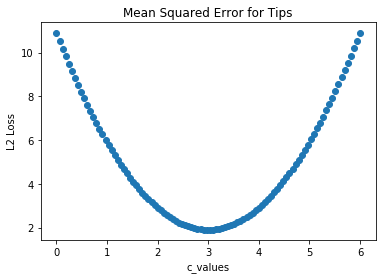

In [12]:
c_values = np.linspace(0, 6, 100)
y = []
for i in c_values:
    y.append(mean_squared_error(i, tips))

plt.scatter(x = c_values, y = y)
plt.title('Mean Squared Error for Tips')
plt.xlabel('c_values')
plt.ylabel('L2 Loss');

# YOUR CODE HERE
#raise NotImplementedError()

Find the value of `c` that minimizes the L2 loss above via observation of the plot you've generated. Round your answer to the nearest integer.

In [13]:
#TODO
min_observed_mse = 3
# YOUR CODE HERE
#raise NotImplementedError()
min_observed_mse

3

In [14]:
# TEST
assert np.isclose(min_observed_mse, 3, atol = 0.1)

## Question 3: Find the Minimizing Value for Our Tips Dataset

The cell below plots some arbitrary 4th degree polynomial function. 

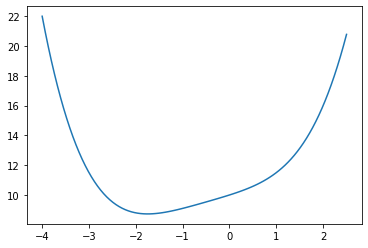

In [15]:
x_values = np.linspace(-4, 2.5, 100)

def fx(x):
    return 0.1 * x**4 + 0.2*x**3 + 0.2 * x **2 + 1 * x + 10

plt.plot(x_values, fx(x_values));

By looking at the plot, we see that the x which minimizes the function is slightly larger than -2. What if we want the exact value?

The function `minimize` from [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) will attempt to minimize any function you throw at it.

Try running the cell below, and you will see that minimize seems to get the answer correct.

Note: For today, we'll let minimize work as if by magic. We'll discuss how `minimize` works later in the course.

In [16]:
minimize(fx, x0 = 1.1)

      fun: 8.728505719866614
 hess_inv: array([[0.50884886]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([-1.74682779])

The `fun` value is the minimum value of the function. The `x` is the x which minimizes the function. We can index into the object returned by `minimize` to get these values. We have to add the additional `[0]` at the end because the minimizing x is returned as an array. The reason for this is that `minimize` can also minimize multivariable functions.

In [17]:
minimization_result_for_fx = minimize(fx, x0 = 0)
min_of_fx = minimization_result_for_fx['fun']
x_which_minimizes_fx = minimization_result_for_fx['x'][0]

The parameter `x0` that we passed to the `minimize` function is where the `minimize` function starts looking as it tries to find the minimum. For example, above, `minimize` started its search at x = 1.1 because that's where we told it to start. For the function above, it doesn't really matter what x we start at because the function is nice and has only a single local minimum. More technically, the function is nice because it is [convex](https://en.wikipedia.org/wiki/Convex_function), a property of functions that we will discuss later in the course.

`minimize` isn't perfect. For example, if we give it a function with many valleys (also known as local minima) it can get stuck. For example, consider the function below:

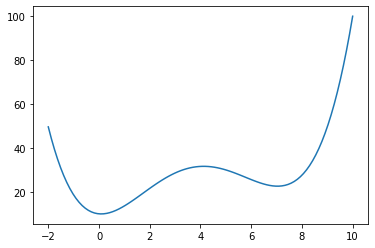

In [18]:
w_values = np.linspace(-2, 10, 100)

def fw(w):
    return 0.1 * w**4 - 1.5*w**3 + 6 * w **2 - 1 * w + 10

plt.plot(w_values, fw(w_values));

If we start the minimization at w = 6.5, we'll get stuck in the local minimum at w = 7.03. Note that no matter what your actual variable is called in your function, the `minimize` routine still calls the starting point `x0`.

In [19]:
minimize(fw, x0 = 6.5)

      fun: 22.594302881719713
 hess_inv: array([[0.12308018]])
      jac: array([-3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([7.03774624])

Now using the `minimize function`, find the value of `c` that minimizes the mean squared error for our tips dataset. In other words, you want to find the exact minimum of the plot that you generated in question 2.

For autograding purposes, assign `min_scipy` to the value of `c` that minimizes the MSE according to the `minimize` function.

Hint: You can't pass your `mean_squared_error` function to `minimize` because `mean_squared_error` has two variables: `c` and `data`. `minimize` will get confused because it thinks it needs to minimize by picking the best `c` and best `data` values. We only want it to play around with `c`.

In other words, you need to pass a function of one variable `c` to the `minimize` function, which means you'll need to create a new function of only ONE variable `c`. This is very simple, but also very tricky when you do this for the first time. Make sure to ask for help if you get stuck.

In [20]:
def mean_squared_error_with_hard_coded_data(c):
    min_scipy = mean_squared_error(c, tips)
    return min_scipy
    # YOUR CODE HERE
    #raise NotImplementedError()
    
min_scipy = minimize(mean_squared_error_with_hard_coded_data, x0=0.0)['x'][0]

In [21]:
# TEST 
assert np.isclose(min_scipy, 2.9982787346405537)

From lecture we know that the value of `c` that minimizes the mean squared error is the average of the data. Assign `min_computed` to the mean of the tips dataset, and compare this to the values you observed in questions 2b and 3a.

In [22]:
min_computed = np.mean(tips)

# YOUR CODE HERE
#raise NotImplementedError()
print(min_computed, min_scipy)

2.99827868852459 2.9982777037277204


In [23]:
# TEST


Reflecting on the lab so far, we've now seen 3 ways to find the summary statistic `c` that minimizes the mean squared error:
1. Create a plot of the MSE for the given data array vs. `c` and eyeball the minimizing `c`.
2. Create a function that returns the MSE for a specific data array as a function of `c` and use the scipy `minimize` function to find the exact `c` which minimizes this function.
3. Simply compute the mean of the data array.

At this point, you've hopefully convinced yourself that the `mean` is the summary statistic that minimizes mean squared error.

# Absolute Loss

## Question 4: Implement the Absolute Loss 

In this section, you will follow the exact same steps as above but for the absolute loss function. Absolute loss is defined as:

$$\Large
L\left(y, c\right) = \left| y - c\right|
$$

In the cell below define the function `abs_loss` which returns the absolute loss given a value of `c` and `y_obs`. 

In [24]:
def abs_loss(c, y_obs):
    return abs(y_obs - c)
    # YOUR CODE HERE
    #raise NotImplementedError()

In [25]:
# TEST
assert abs_loss(1, 1) == 0


In [26]:
# TEST
assert abs_loss(2, 1)==1


## Question 4b: Plotting the Absolute Loss

In the cell below, plot the absolute loss for different values of `c`. Note that the values of `c` have already been given to you. Don't forget to label the vertical axis `L2 loss` and the horizontal axis `c`.

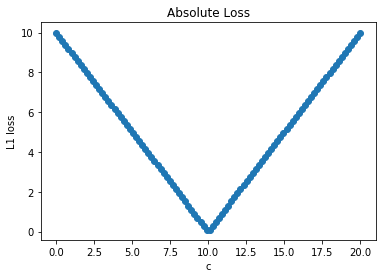

In [27]:
y_obs = 10
c_values = np.linspace(0, 20, 100) # some arbitrary values of c

values = []
for i in range(len(c_values)):
    values.append(abs_loss(y_obs, c_values[i]))

plt.scatter(x = c_values, y = values)
plt.title('Absolute Loss')
plt.xlabel('c')
plt.ylabel('L1 loss');

# YOUR CODE HERE
#raise NotImplementedError()

q4b_gca = plt.gca(); # leave for grading purposes

In [28]:
# TEST 

assert q4b_gca.get_xlabel() == "c"
assert q4b_gca.get_ylabel() == "L1 loss"


## Question 5: Mean Absolute Error for the Tips Data

Define the `mean_absolute_error` function which computes the mean absolute error given the data and a value for `c`.

In [29]:
def mean_absolute_error(c, data):
    lst = []
    for x in data:
        lst.append(abs_loss(x, c))
    return sum(lst)/len(data)
    # YOUR CODE HERE
    #raise NotImplementedError()

In [30]:
# TEST

assert np.isclose(mean_absolute_error(1, np.array([1,2,3])), 1.0)
assert np.isclose(mean_absolute_error(3, np.array([4,5,6])), 2.0)


In the cell below plot the mean absolute error for different `c` values and the `tips` dataset. Note that `c_values` are given. Make sure to label the axes on your plot.

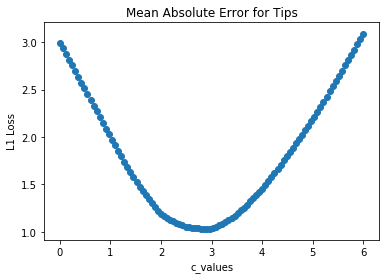

In [31]:
c_values = np.linspace(0, 6, 100)

y = []
for i in c_values:
    y.append(mean_absolute_error(i, tips))

plt.scatter(x = c_values, y = y)
plt.title('Mean Absolute Error for Tips')
plt.xlabel('c_values')
plt.ylabel('L1 Loss');
# YOUR CODE HERE
#raise NotImplementedError()

You should see that the plot looks somewhat to the plot of the mean squared error. Try to identify any key differences you observe and write them down below. This might be more fun with a partner. Note, your answer will not be graded, so don't worry about writing a detailed answer. If you want to see our answer, see the very end of this lab notebook.

To minimize the function, let's zoom in closer to the minimizing c. Plot the mean absolute error again using the given `c_values` below.

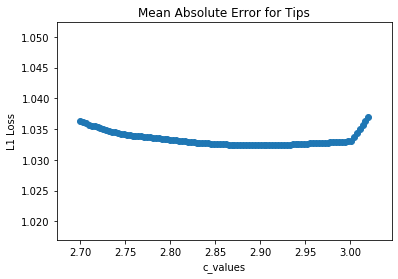

In [32]:
c_values = np.linspace(2.7, 3.02, 100)

y = []
for i in c_values:
    y.append(mean_absolute_error(i, tips))

plt.scatter(c_values, y)
plt.title('Mean Absolute Error for Tips')
plt.xlabel('c_values')
plt.ylabel('L1 Loss');
# YOUR CODE HERE
#raise NotImplementedError()

This time, observe that the function is piecewise linear and has a slope of zero near its minimum. Because of the large flat region at the minimum, there are multiple values of `c` that minimize the L1 loss.

Give a `c` rounded to the nearest tenth that minimizes L1 loss. By "rounded to the nearest tenth" we mean you'd say 7.6 instead of 7.55.

In [33]:
min_observed_mae = 2.9

# YOUR CODE HERE
#raise NotImplementedError()

In [34]:
# TEST 

assert 2 < min_observed_mae < 4


## Question 6: Find the Minimizing Value Using Absolute Error

As before, we will use the `minimize` function to find a solution. Assign `min_abs_scipy` to the value of `c` that minimizes the MAE according to the `minimize` function for the `tips` data. Note: Depending on the `x0` value you specify, you will get different results! 

Extra: Try various `x0` values and record the different outputs you get from `minimize`. Use the plot you created above to verify that these are all valid minimizing statistics.

In [35]:
def mean_absolute_error_of_data(c):
    min_abs_scipy = mean_absolute_error(c, tips)
    return min_abs_scipy
    # YOUR CODE HERE
    #raise NotImplementedError()
    
min_abs_scipy = minimize(mean_absolute_error_of_data, x0=0)['x'][0]

In [36]:
# TEST 

assert min_abs_scipy > 2.89 


Just like the MSE, there are three ways to compute the summary statistic `c` that minimizes the MAE:
1. Create a plot of the MAE for the given data array vs. `c` and eyeball a minimizing `c`.
2. Create a function that returns the MAE for a specific data array as a function of `c` and use the scipy `minimize` function to find an exact `c` which minimizes this function.
3. Simply compute the ?????? of the data array.

Try to figure out what to substitute in for the ?????? above. To this, try out various statistics functions provided by `np`. A list and documentation is available at [https://docs.scipy.org/doc/numpy/reference/routines.statistics.html](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html).

Assign `min_abs_computed` to the correct summary statistic using method `#3` from the previous problem.

In [37]:
min_abs_computed = np.percentile(tips, 50)
print(min_abs_computed, min_abs_scipy)

# YOUR CODE HERE
#raise NotImplementedError()

2.9 2.8915493740446334


In [38]:
# TEST 

assert 2.8999 <= min_abs_computed


#### Our Observations on Differences Between MAE vs. MSE

Earlier in this lab, we said we'd describe our observations about the differences between the MAE and MSE.

There are three key differences that we identified between the plots of the MSE and MAE.

1. The minimizing c is different (slightly smaller for MAE).
2. The plot for MAE increases linearly instead of quadratically as we move far away from the minimizing c.
3. The plot for MAE is piecewise linear instead of smooth. Each change in slope happens at the same c value as a data point in our dataset.